#### Business Analytics FHDW 2024
# Korrelationsanalyse zur Dimensionsreduktion
## am Beispiel von Daten über Frühstücksflocken

In Anlehnung an ein Beispiel aus Shmueli et al. betrachten wir den beliebten Datensatz *cereal.csv*, den wir in ein `DataFrame` einlesen.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cereals_df = pd.read_csv('./Daten/cereal.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


Zu diesem Datensatz generieren wir uns die Korrelationsmatrix. Die Methode `corr` auf den Dataframe liefert uns in diesem Fall (default-Parameter `method='pearson'`) die Korrelationskoeffizienten nach Bravais-Pearson, also $r_{x,y}=\frac{s_{x,y}}{s_x \cdot s_y}$ (die Definition der Parameter kennen Sie aus WSTA, DAML und anderen Veranstaltungen).

In [2]:
corr = cereals_df.corr(numeric_only=True)
corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,-0.192650,0.138467,0.367460,0.088712
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.068377,0.455844,-0.048961,-0.763902
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.385784,0.419933,-0.501607,0.416009
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.192650,0.068377,0.385784,0.299262,1.000000,0.190762,-0.335269,0.025159


Da wir zunächst ja die Dimensionen "halbautomatisch" aus menschlicher Sicht reduzieren wollen, vereinfachen wir uns die Auswahl potentieller Reduktionskandidaten ein wenig. Dabei hilft uns *seaborn* mit seiner `heatmap`.

<Axes: >

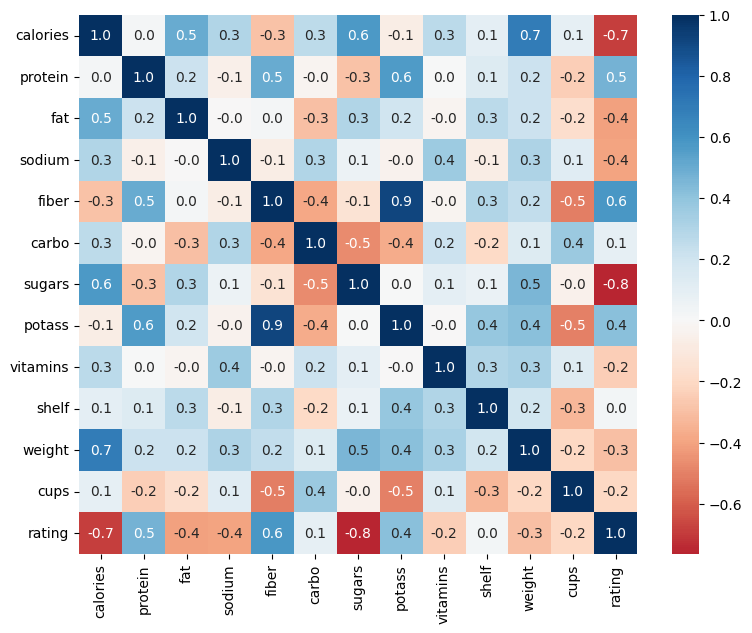

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdBu', center=0, ax=ax)

Hier erkennen wir durch die farblichen Hervorhebungen recht schnell Variablenpaare mit starker - positiver oder negativer - Korrelation. Davon könnten wir jeweils eine Variable aus dem Datensatz entfernen. Ob das immer ein valides Vorgehen ist, schauen wir uns im nächsten Abschnitt an.

## Aufgabe

Konstruieren Sie einen Datensatz aus fünf Variablen, von denen zwei nach unserem einfachen Korrelationskriterium redundant sind. *Randbedingungen*: Nutzen Sie Wertebereiche $[0, 10]$, einmal positive, einmal negative Korrelation, fünf Datenpunkte, arbeiten Sie mit Abweichungen. 

Zeigen Sie das Resultat mit einer Matrix.